In [ ]:
#TODO 
#Scala di grigi
#Più immagini 

#import e gloabals e funzioni
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import Generator, PCG64
%matplotlib inline

DPI = 300

#Valori in cm
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

#impostazione della dimesione dei font
plt.rcParams.update({'font.size': 8})

#np.random.seed(10)
print(np.random.normal(0,1,1))

[0.45718562]


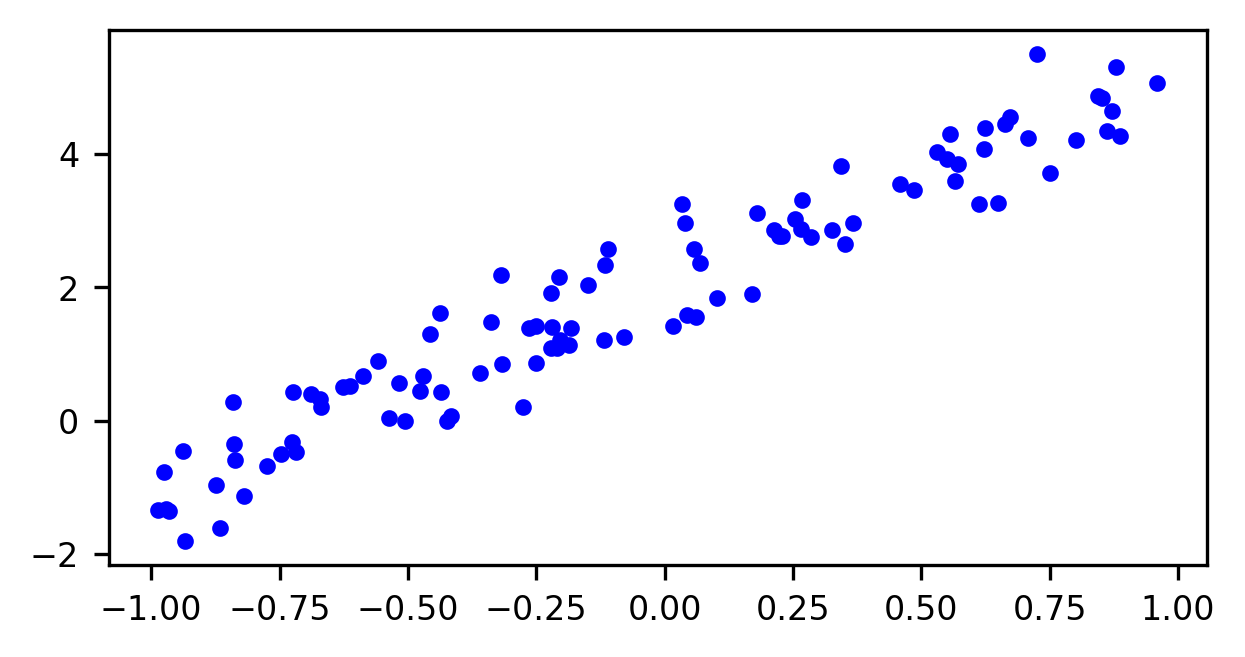

In [ ]:
x = np.random.uniform(-1, 1, 100)
y = 2 + 3 * x + np.random.normal(0,0.5,100)

fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI)
ax.plot(x, y, "b.")
#ax.set_ylabel('y')
#ax.set_xlabel('x')
fig.savefig('2.1.png')
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), x]  # aggiungiamo 1 ad ogni istanza della variabile indipendnente
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[2.06675664 3.1435152 ]


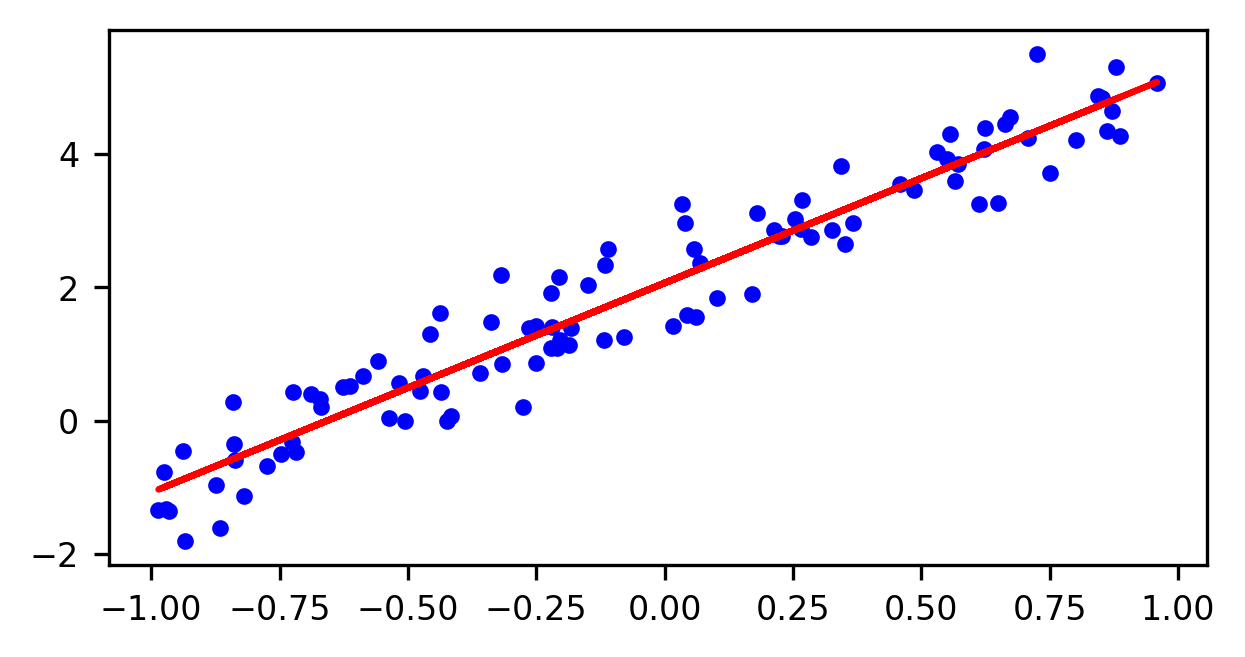

In [ ]:
line = theta_best[1]*np.array(x)+theta_best[0]

fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI) 
ax.plot(x, y, "b.")
ax.plot(x, line, "r")
#ax.set_ylabel('y')
#ax.set_xlabel('x')
fig.savefig('2.2.png')
plt.show()


In [ ]:
from sklearn.linear_model import SGDRegressor

def Vvol():
  y = []
  coin = np.random.uniform(-1,1)
  #coin = 1  
  if coin > 0: s = (0.5)
  if coin < 0: s = (10)
  return s

x = [] 
y = []
for i in range(1000):
  s = Vvol()
  x_i = np.random.uniform(-1,1)
  x.append(x_i)
  rnd = 2 + 3 * x_i + np.random.normal(0,s)# + np.random.uniform(-0.3,-0.3)
  y.append(rnd)

x = np.array(x)
y = np.array(y)

#MSE
sgd = SGDRegressor(loss='squared_loss', max_iter=10000, eta0=0.1)
sgd.fit(x.reshape(-1, 1),y)
theta_MSE = (sgd.coef_, sgd.intercept_)
print(theta_MSE[1],theta_MSE[0])
line_MSE = theta_MSE[1]*x+theta_MSE[0]

#MAE
sgd = SGDRegressor(loss='epsilon_insensitive', epsilon=0 , max_iter=10000, eta0=0.1)
sgd.fit(x.reshape(-1, 1),y)
theta_MAE = (sgd.coef_, sgd.intercept_)
print(theta_MAE[1],theta_MAE[0])
line_MAE = theta_MAE[1]*x+theta_MAE[0]

[1.10397548] [3.17992933]
[2.01457449] [2.97442777]


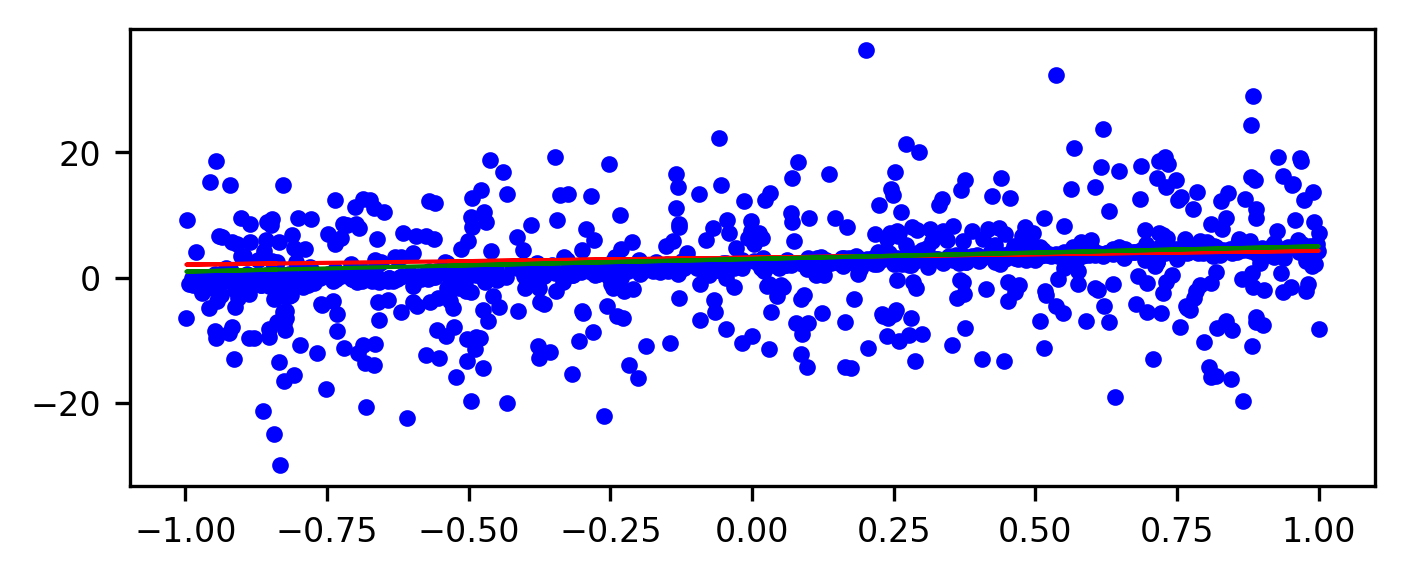

In [ ]:
fs=(cm2inch(12,5))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
ax.plot(x, y, "b.")
#ax[1].plot(x, y, "b.")
ax.plot(x, line_MSE, "r", linewidth=1)
ax.plot(x, line_MAE, "g", linewidth=1)
#ax.set_ylabel('y')
#ax.set_xlabel('x')
fig.savefig('2.3.png')
plt.show()

In [ ]:
np.random.seed(2020)

x = np.random.uniform(-4,4, 150)
y = 0.8 * x**2 - x - 10 + np.random.normal(0, 1, 150)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

quad_features = PolynomialFeatures(degree=2, include_bias=False)
x_quad = quad_features.fit_transform(x.reshape(-1, 1))


xs = np.linspace(-4, 4, 150)

lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1,1), y)
lin = lin_reg.intercept_, lin_reg.coef_
line_lin = lin[1][0]*x+lin[0]

quad_reg = LinearRegression()
quad_reg.fit(x_quad, y)
quad = quad_reg.intercept_, quad_reg.coef_
line_quad = quad[0] + quad[1][0]*xs + quad[1][1]*(xs**2)
#print(quad)

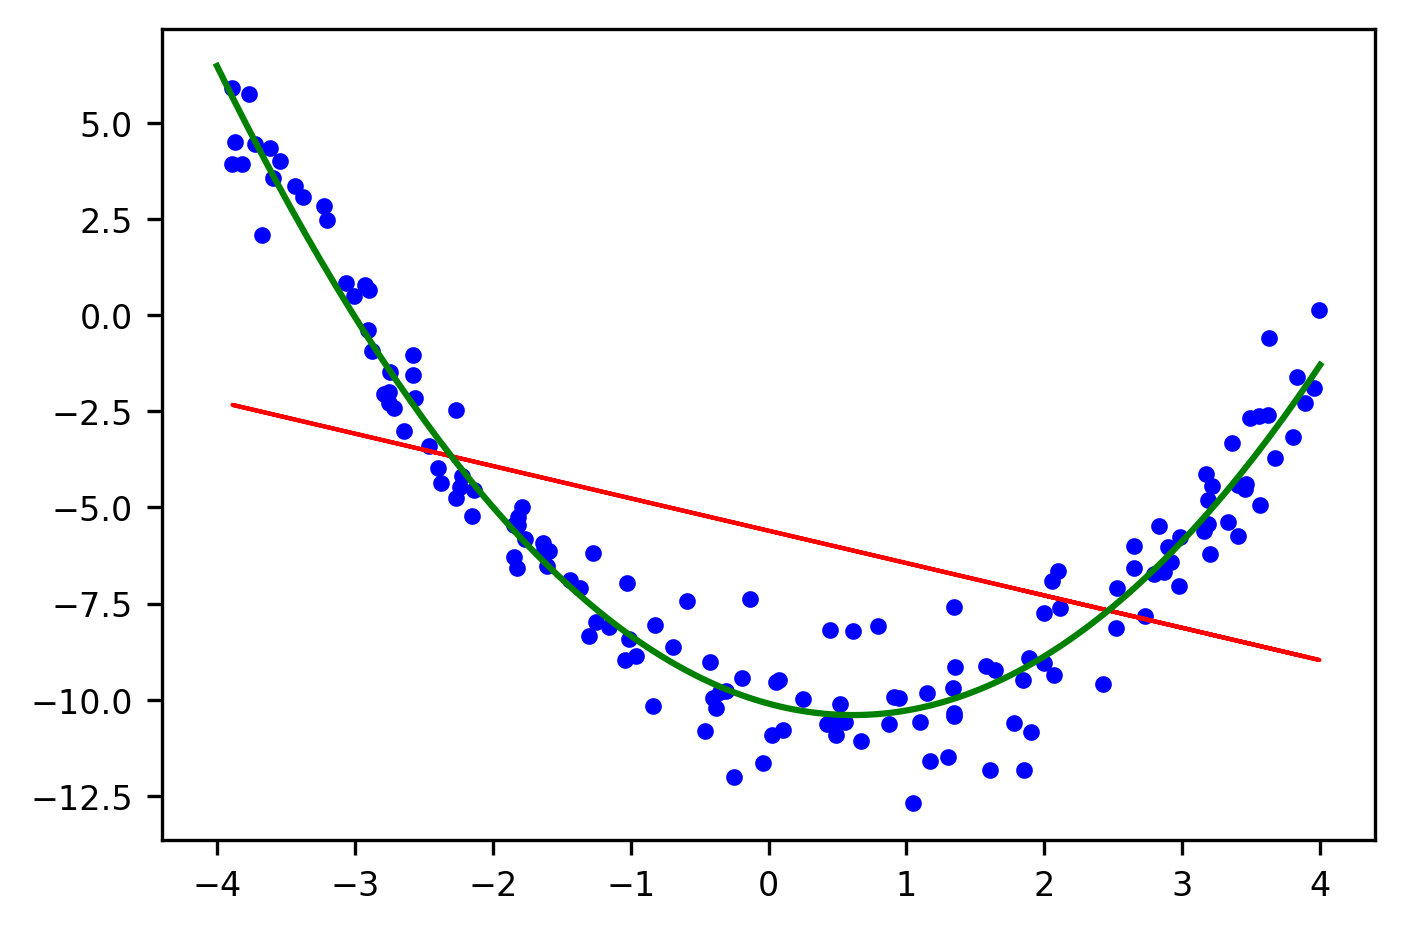

In [ ]:
fs=(cm2inch(12,8))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
ax.plot(x, y, "b.")
ax.plot(x, line_lin, "r", linewidth=1)
ax.plot(xs, line_quad, "g")
#ax.set_ylabel('y')
#ax.set_xlabel('x')
fig.savefig('2.4.png')
plt.show()

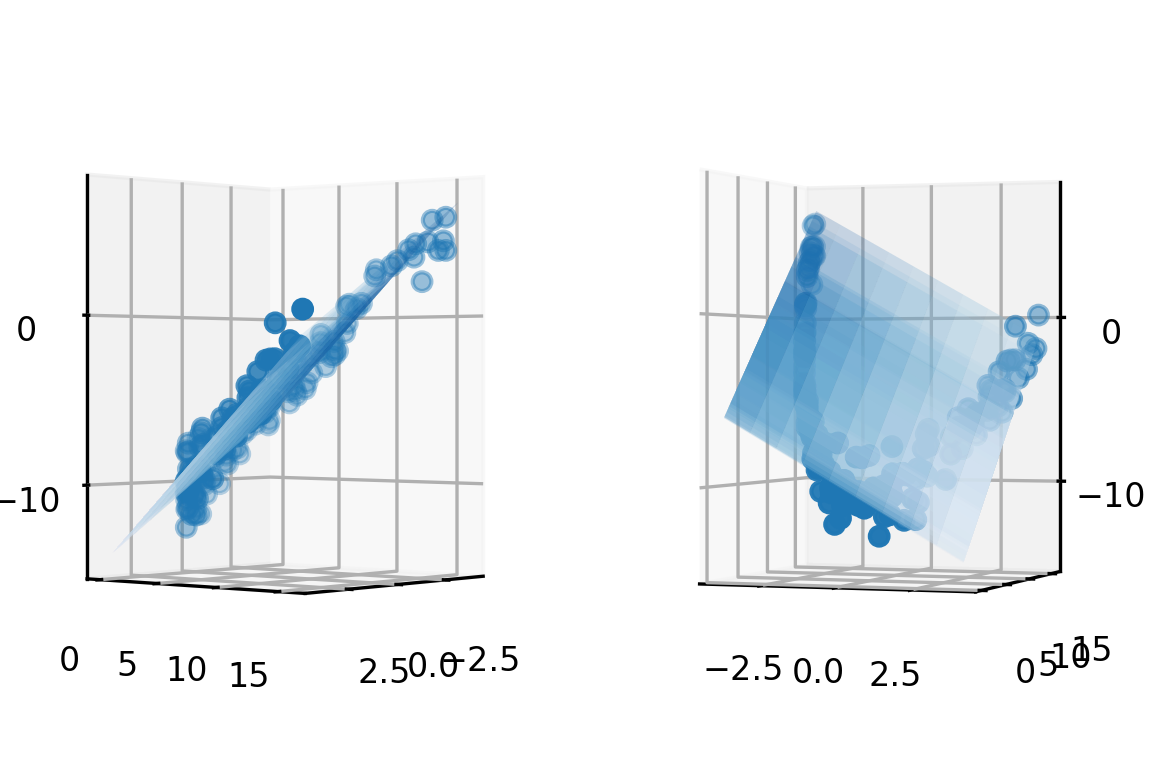

In [ ]:
import matplotlib.gridspec as gridspec
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D


fs=(cm2inch(12,8))

fig = plt.figure(figsize=fs, dpi=300)
G = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(G[0:3,0], projection='3d')
ax1.view_init(0, 40)
ax1.scatter(x, x**2, y)
a = np.linspace(-4,4,10)
b = x**2
X,Y = np.meshgrid(a,b)
Z = 0.8*Y-X-10
ax1.plot_surface(X, Y, Z, cmap='Blues', alpha=0.1)


ax2 = fig.add_subplot(G[0:3,1], projection='3d')
ax2.view_init(0, -70)
ax2.scatter(x, x**2, y)
ax2.plot_surface(X, Y, Z, cmap='Blues', alpha=0.1)

plt.show()

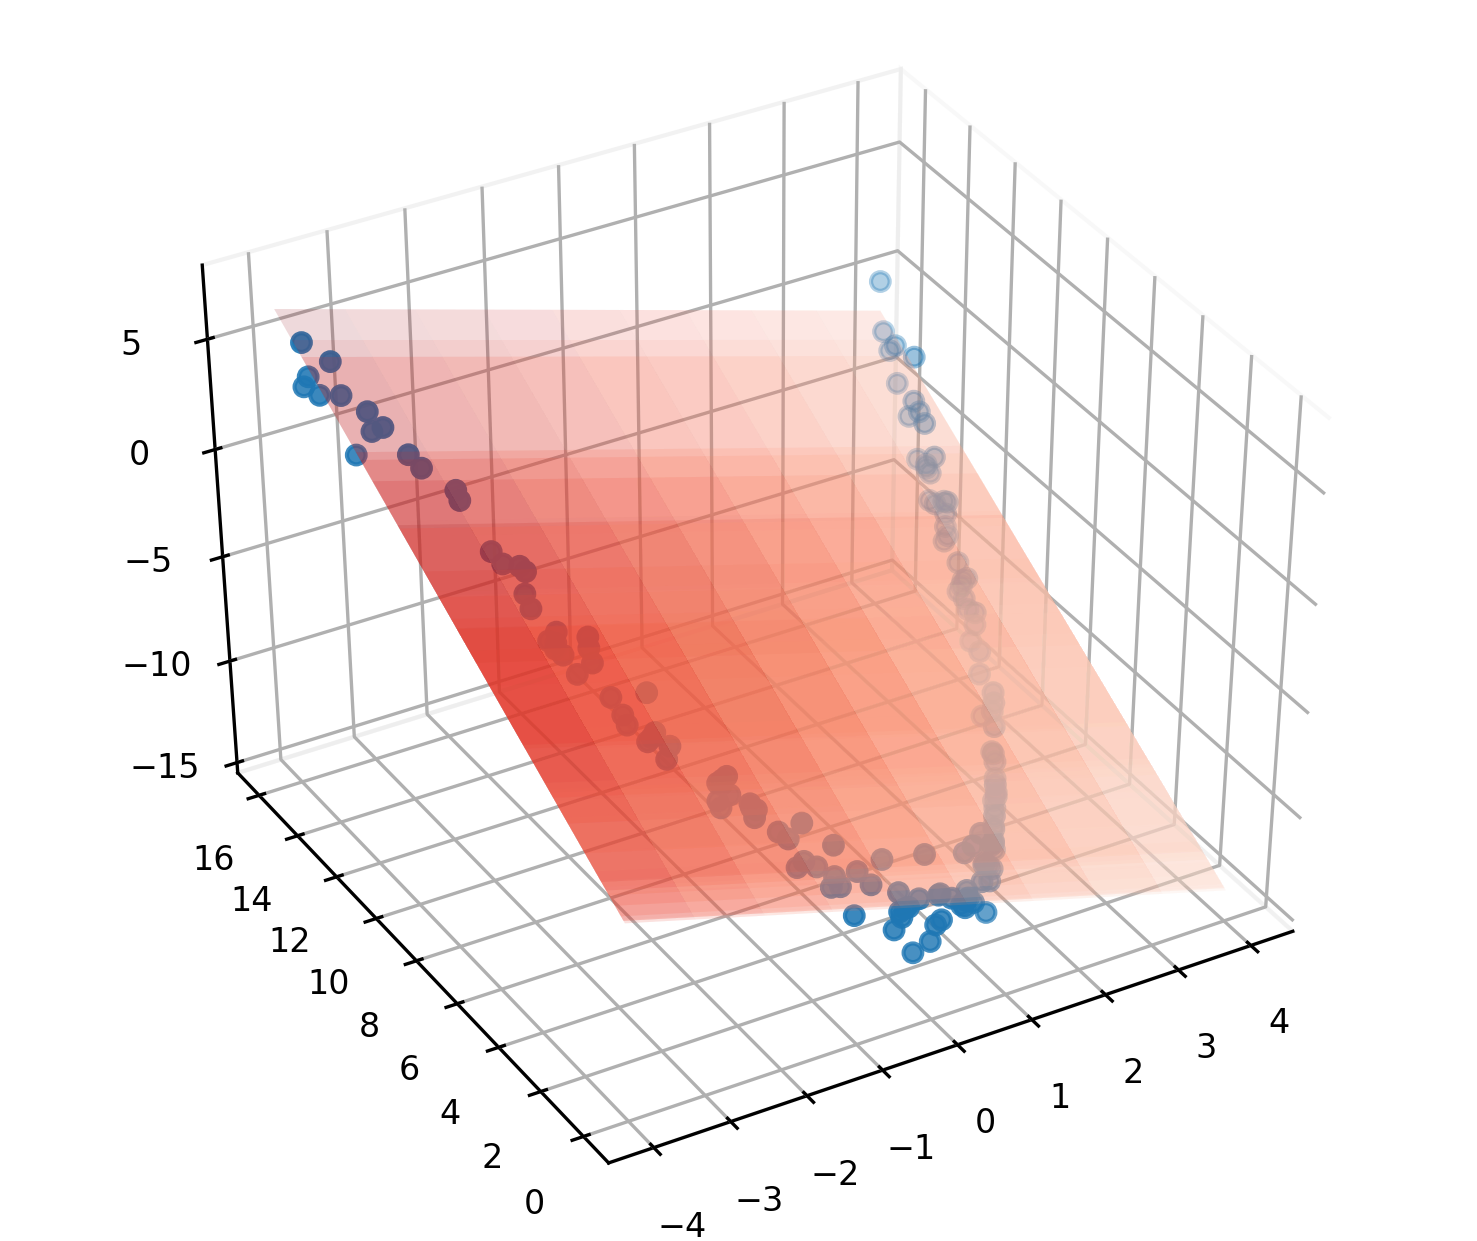

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

fs=(cm2inch(12,10))
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=fs, dpi=300)
ax = Axes3D(fig)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.view_init(40, -120)
ax.scatter(x, x**2, y)

a = np.linspace(-4,4,10)
b = x**2
X,Y = np.meshgrid(a,b)
Z = 0.8*Y-X-10
ax.plot_surface(X, Y, Z, cmap='Reds', alpha=0.08)
fig.savefig('2.5.png')
pyplot.show()

0.6945094479192381
0.6583671015705043
7.2203267319344725e+165
1.1455200629529274e+82
0.953639651604882
0.7934822562656317
1.8298685909485353
1.0693914120864805
32.13831384694901
4.701817558726173
4722.176858762029
45.50589362457779


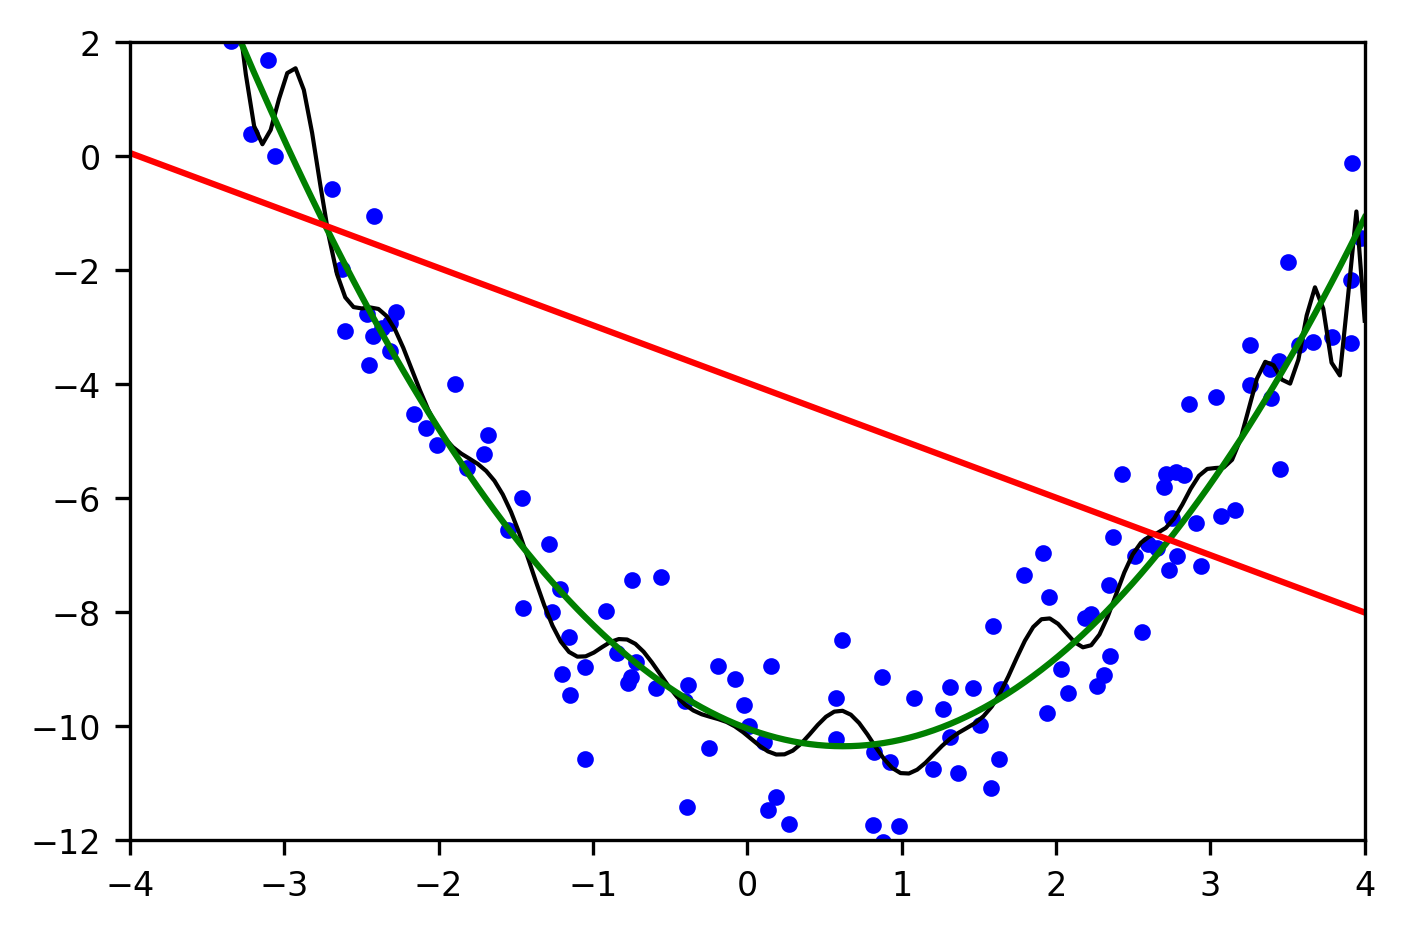

In [ ]:
np.random.seed(20)

from sklearn.metrics import mean_squared_error, mean_absolute_error

m = 150
X = 10 * np.random.rand(m, 1) - 5
X_new=np.linspace(-4, 4, 150).reshape(150, 1)
y = 0.8 * X**2 - X - 10 + np.random.randn(m, 1)*1

x_test = 20 * np.random.rand(m, 1) - 5
y_test = 0.8 * x_test**2 - x_test - 10 + np.random.randn(m, 1)*1

X_new=np.linspace(-4, 4, 150).reshape(150, 1)
X_new_test=np.linspace(-15, 25, 150).reshape(150, 1)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

fs=(cm2inch(12,8))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
ax.plot(X, y, "b.", linewidth=3)
plt.axis([-4, 4, -12, 2])


for style, width, degree in (("black", 1, 149), ("g", 1.5, 2), ("r", 1.5, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", poly_features),
            ("std_scaler", std_scaler),
            ("reg", reg),
        ])
    polynomial_regression.fit(X, y)    
    #print(polynomial_regression.score(X, y))    
    y_new = polynomial_regression.predict(X_new) 
    y_point = polynomial_regression.predict(X)
    y_point_test = polynomial_regression.predict(x_test)
    y_new_test = polynomial_regression.predict(X_new_test)
    print(mean_squared_error(y_point, y)) 
    print(mean_absolute_error(y_point, y))
    print(mean_squared_error(y_point_test, y_test)) 
    print(mean_absolute_error(y_point_test, y_test))     
    ax.plot(X_new, y_new, style, linewidth=width)
    #ax.plot(X_new, y_new_test, style, linewidth=width)

fig.savefig('2.6.png')
plt.show()

-7.647676999377762 [-1.54440993  1.56102327 -0.28039223  0.84036017 -0.26142795  0.29071987
 -0.15789551 -0.0818076   0.14013832 -0.27373069  0.49891289 -0.30617625]
-7.647676999377762 [-1.08710183  1.13070864 -0.50569062  0.65378807 -0.19416843  0.3141848
 -0.01178456  0.08535308  0.10482583 -0.06797517  0.1816245  -0.17048059]
-7.647676999377762 [-0.88432293  0.90871362 -0.44874124  0.55925238 -0.19975982  0.30787879
 -0.05214246  0.13720145  0.0409879   0.02126225  0.10141526 -0.05811792]


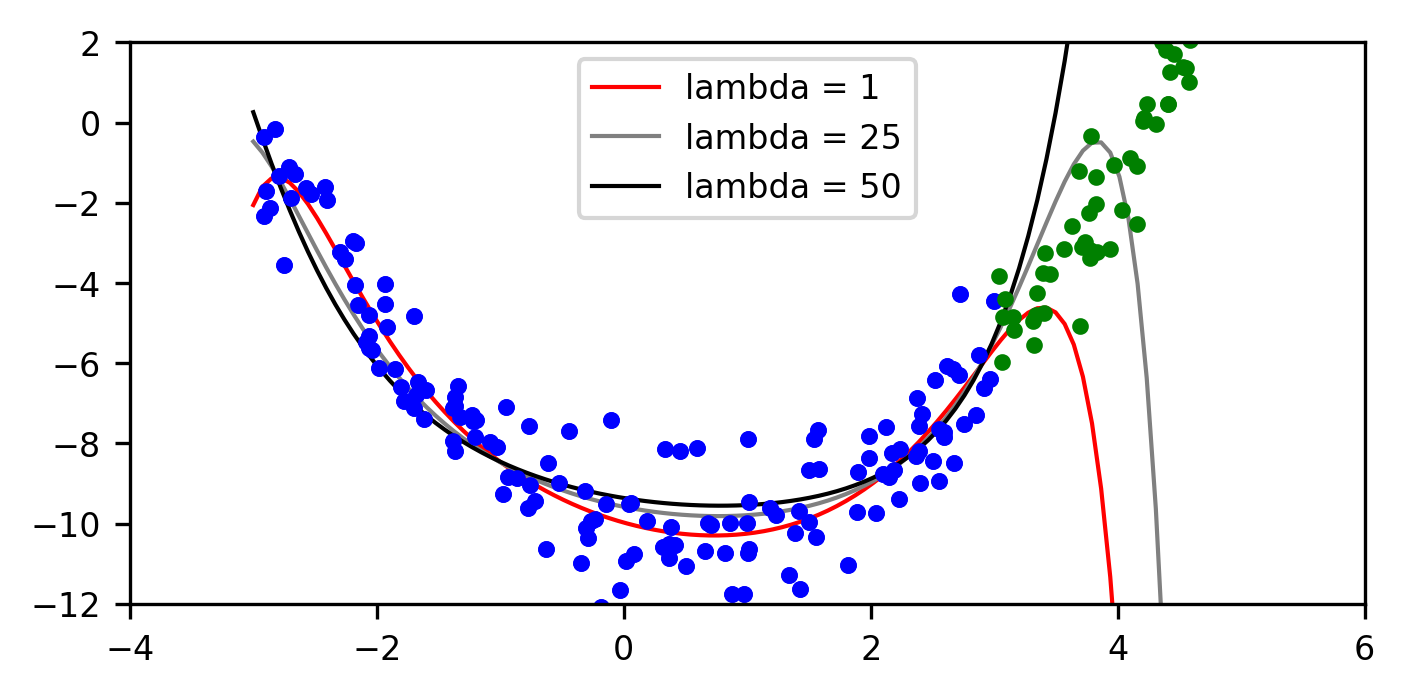

In [ ]:
np.random.seed(2020)

m = 150

x = np.random.uniform(-3,3, m)
y = 0.8 * x**2 - x - 10 + np.random.normal(0, 1, m)
x_new=np.linspace(-3, 8, m).reshape(m, 1)

x_test = np.random.uniform(3,8, m)
y_test =  0.8 * x_test**2 - x_test - 10 + np.random.normal(0, 1, m)

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
ax.plot(x, y, "b.", linewidth=3)
plt.axis([-4, 6, -12, 2])

def plot_model(alphas, d=12):
  styles = ['black','gray','red']
  for a in alphas:
    reg_model = Ridge(a)
    model = Pipeline([
                      ("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
                      ("std_scaler", StandardScaler()),
                      ("reg", reg_model),
                      ])    
    model.fit(x.reshape(-1,1),y)
    y_new = model.predict(x_new)
    ax.plot(x_new, y_new, styles.pop(), linewidth=1, label='lambda = ' + str(a))    
    print(reg_model.intercept_, reg_model.coef_)
  ax.plot(x, y, "b.", linewidth=1)
  ax.plot(x_test, y_test, "g.", linewidth=1)
  ax.legend()
  plt.show()
  fig.savefig('2.8.png')

plot_model([1, 25, 50])

-7.647676999377762 [-1.17380819  1.58081814 -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.        ]
-7.647676999377762 [-0.62956177  1.03657213 -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.        ]
-7.647676999377762 [-0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0.]


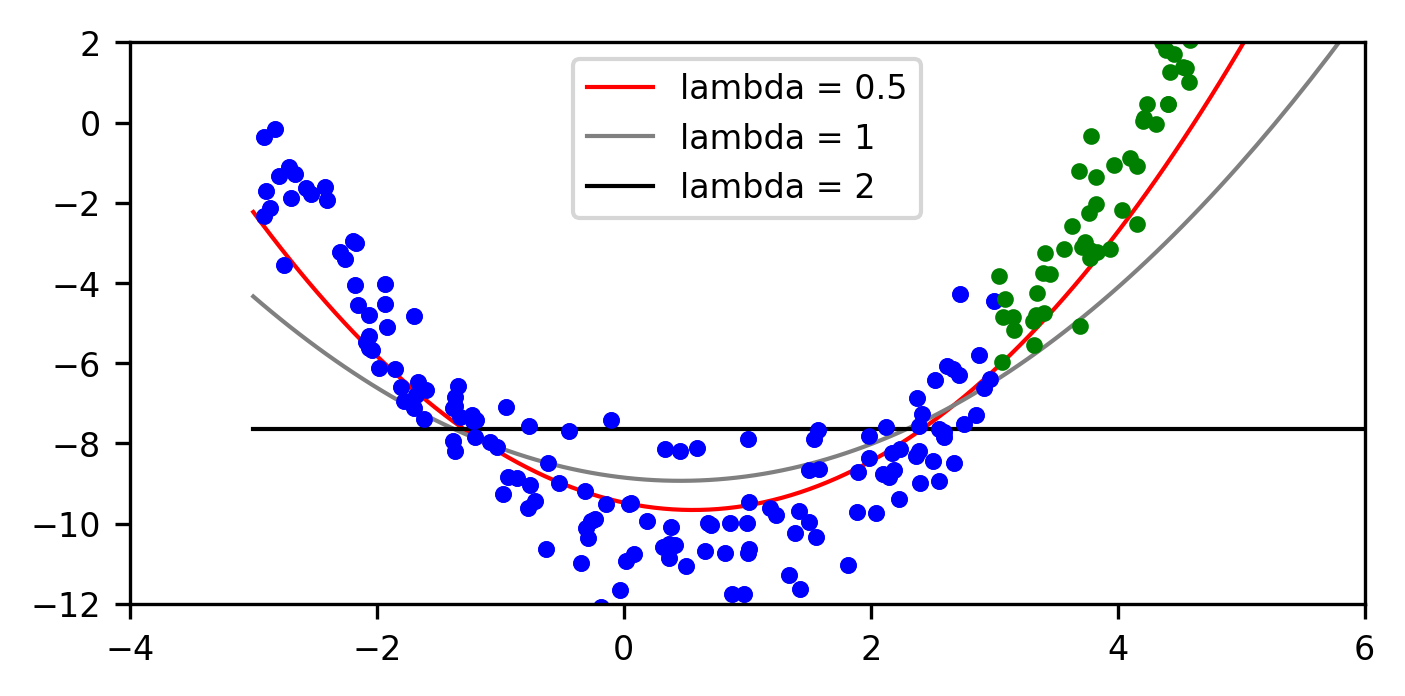

In [ ]:
import numpy as np

np.random.seed(2020)

m = 150

x = np.random.uniform(-3,3, m)
y = 0.8 * x**2 - x - 10 + np.random.normal(0, 1, m)
x_new=np.linspace(-3, 8, m).reshape(m, 1)

x_test = np.random.uniform(3,8, m)
y_test =  0.8 * x_test**2 - x_test - 10 + np.random.normal(0, 1, m)

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
ax.plot(x, y, "b.", linewidth=3)
plt.axis([-4, 6, -12, 2])

def plot_model(alphas, d=12):
  styles = ['black','gray','red']
  for a in alphas:
    reg_model = Lasso(a)
    model = Pipeline([("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
                  ("std_scaler", StandardScaler()),
                  ("reg", reg_model),
                ])
    model.fit(x.reshape(-1,1),y)
    y_new = model.predict(x_new)
    ax.plot(x_new, y_new, styles.pop(), linewidth=1, label='lambda = ' + str(a))       
    print(reg_model.intercept_, reg_model.coef_)
  ax.plot(x, y, "b.", linewidth=1)
  ax.plot(x_test, y_test, "g.", linewidth=1)
  ax.legend()
  plt.show()
  fig.savefig('2.9.png')

plot_model([0.5, 1, 2])

-7.647676999377762 [-1.44012904  1.50486865 -0.17582058  0.50893168 -0.          0.
  0.          0.          0.         -0.          0.01649079 -0.        ]
-7.647676999377762 [-0.5848097   0.62709411 -0.27088658  0.4023943  -0.03329834  0.20729223
 -0.          0.05932544 -0.          0.         -0.          0.        ]
-7.647676999377762 [-0.26102927  0.33701704 -0.08971529  0.2279442  -0.          0.11531137
 -0.          0.02286503 -0.          0.         -0.          0.        ]


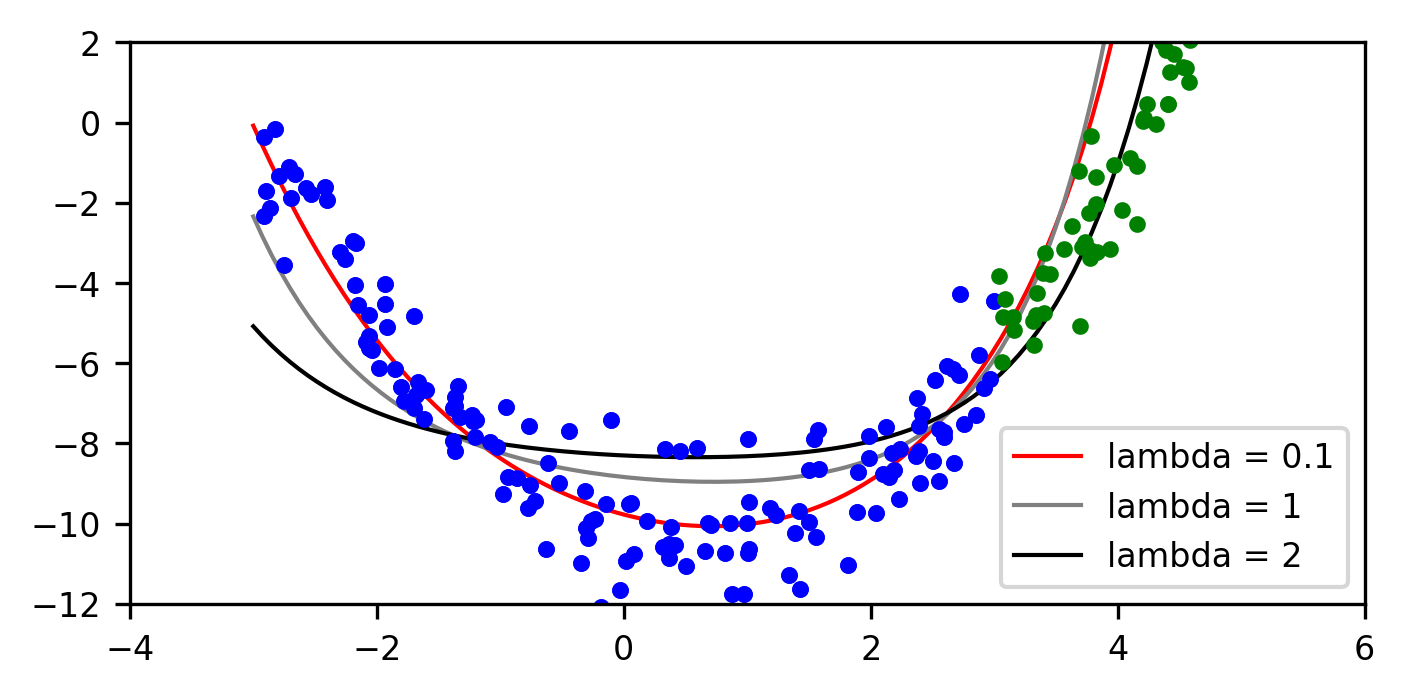

In [ ]:
import numpy as np

np.random.seed(2020)

m = 150

x = np.random.uniform(-3,3, m)
y = 0.8 * x**2 - x - 10 + np.random.normal(0, 1, m)
x_new=np.linspace(-3, 8, m).reshape(m, 1)

x_test = np.random.uniform(3,8, m)
y_test =  0.8 * x_test**2 - x_test - 10 + np.random.normal(0, 1, m)

from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline

fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
ax.plot(x, y, "b.", linewidth=3)
plt.axis([-4, 6, -12, 2])

def plot_model(alphas, d=12):
  styles = ['black','gray','red']
  for a in alphas:
    reg_model = ElasticNet(alpha=a, l1_ratio=0.5)
    model = Pipeline([("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
                  ("std_scaler", StandardScaler()),
                  ("reg", reg_model),
                ])
    model.fit(x.reshape(-1,1),y)
    y_new = model.predict(x_new)
    ax.plot(x_new, y_new, styles.pop(), linewidth=1, label='lambda = ' + str(a))       
    print(reg_model.intercept_, reg_model.coef_)
  ax.plot(x, y, "b.", linewidth=1)
  ax.plot(x_test, y_test, "g.", linewidth=1)
  ax.legend()
  plt.show()
  fig.savefig('2.10.png')

plot_model([0.1, 1, 2])

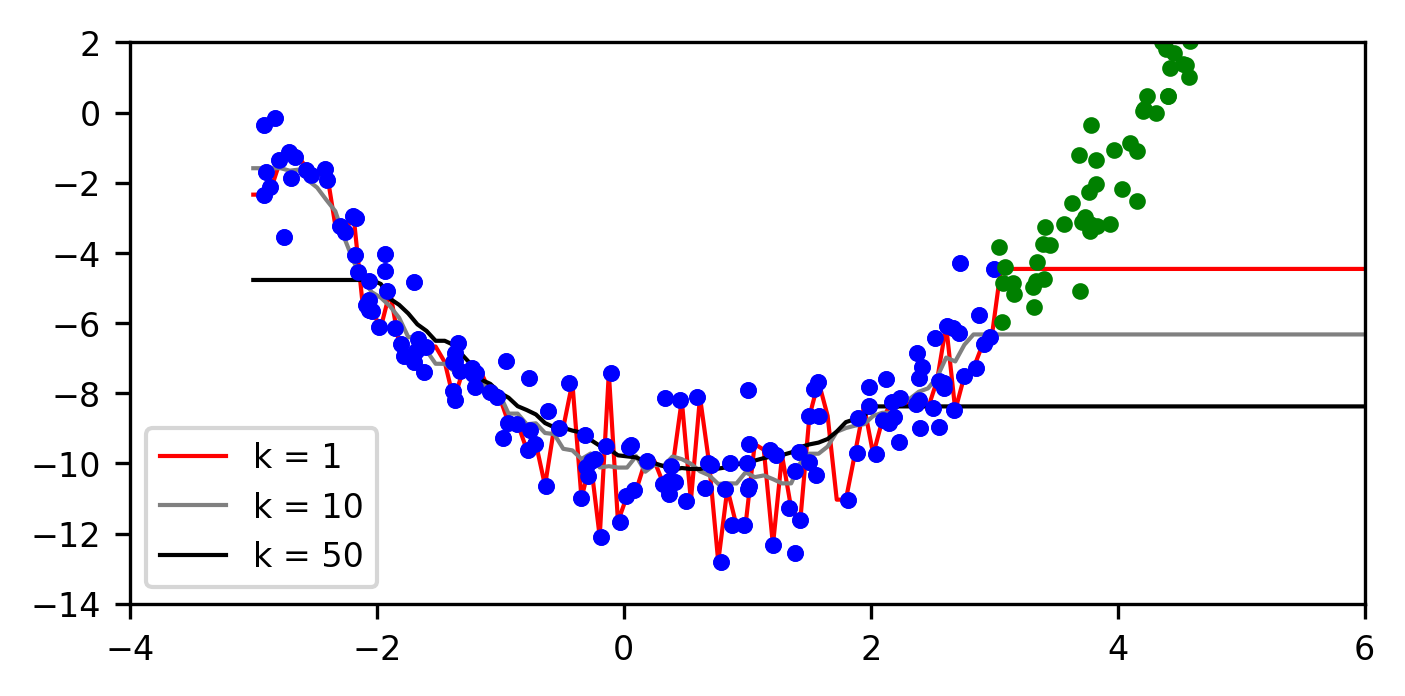

In [ ]:
import numpy as np

np.random.seed(2020)

m = 150

x = np.random.uniform(-3,3, m)
y = 0.8 * x**2 - x - 10 + np.random.normal(0, 1, m)
x_new=np.linspace(-3, 8, m).reshape(m, 1)

x_test = np.random.uniform(3,8, m)
y_test =  0.8 * x_test**2 - x_test - 10 + np.random.normal(0, 1, m)

from sklearn.neighbors import KNeighborsRegressor
kNN = KNeighborsRegressor(n_neighbors=5)
kNN.fit(x.reshape(-1,1), y)




fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
ax.plot(x, y, "b.", linewidth=3)
plt.axis([-4, 6, -14, 2])

def plot_model(alphas):
  styles = ['black','gray','red']
  for a in alphas:
    kNN = KNeighborsRegressor(n_neighbors=a)
    kNN.fit(x.reshape(-1,1), y)
    y_new = kNN.predict(x_new)
    ax.plot(x_new, y_new, styles.pop(), linewidth=1, label='k = ' + str(a))   
  ax.plot(x, y, "b.", linewidth=1)
  ax.plot(x_test, y_test, "g.", linewidth=1)
  ax.legend()
  plt.show()
  fig.savefig('2.15.png')

plot_model([1, 10, 50])







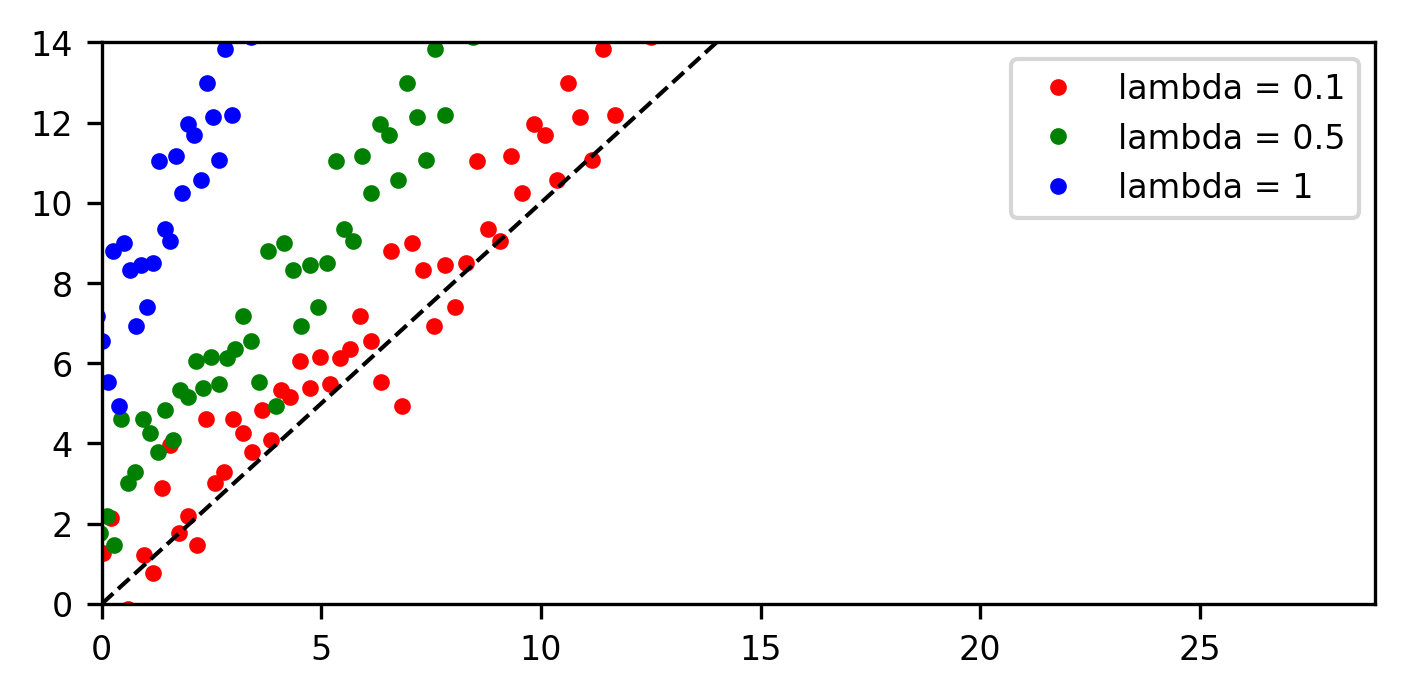

In [ ]:
#Line of agreement

import numpy as np

np.random.seed(2020)

m = 150

x = np.random.uniform(-3,3, m)
y = 0.8 * x**2 - x - 10 + np.random.normal(0, 1, m)
x_new= np.linspace(3, 8, m)
y_plot = 0.8 * x_new**2 - x_new - 10 + np.random.normal(0, 1, m)
x_test = np.random.uniform(3,8, m)
y_test =  0.8 * x_test**2 - x_test - 10 + np.random.normal(0, 1, m)

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=1, tight_layout=True)
#ax.plot(x, y, "b.", linewidth=3)
plt.axis([0, 29, 0, 14])

def plot_model(alphas, d=12):
  styles = ['b.','g.','r.']
  for a in alphas:
    reg_model = Lasso(a)
    model = Pipeline([("poly_features", PolynomialFeatures(degree=d, include_bias=False)),
                  ("std_scaler", StandardScaler()),
                  ("reg", reg_model),
                ])
    model.fit(x.reshape(-1,1),y)
    y_new = model.predict(x_new.reshape(-1,1))
    ax.plot(y_new, y_plot, styles.pop(), label='lambda = ' + str(a)) 
  ax.plot([0, 30], [0, 30], color='k', linestyle='--', linewidth=1)  
  ax.legend()
  plt.show()
  fig.savefig('2.16.png')

plot_model([0.1, 0.5, 1])


In [ ]:
import numpy as np

np.random.seed(25)

m = 300

x = np.random.uniform(0,3, m)
y = 1.9 * x - 1.1 + np.random.normal(0, 1, m)


y_fit = 1.8 * x - 1.02

SSR = (sum((y-y_fit)**2))
SSV = (sum((y - sum(y)/len(y))**2))
print('R2 = ' + str(1 - SSR/SSV))
print('MSE = ' + str(SSR/len(y)))

m = 600

x = np.random.uniform(0,6, m)
y = 1.9 * x - 1.1 + np.random.normal(0, 1, m)

y_fit = 1.8 * x - 1.02

SSR = (sum((y-y_fit)**2))
SSV = (sum((y - sum(y)/len(y))**2))
print('R2 = ' + str(1 - SSR/SSV))
print('MSE = ' + str(SSR/len(y)))



R2 = 0.7088653451318201
MSE = 1.0060915808750586
R2 = 0.9087128954501604
MSE = 1.0797527353177172
